In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import geopandas as gpd
from folium.plugins import HeatMap, HeatMapWithTime
import io
from PIL import Image

In [9]:
df = pd.read_csv('/Users/carlosgovea/Documents/Flatiron/Phas-2-Project/Phase-2-Project/data/cleaned_2.csv')

In [10]:
df2 =pd.read_csv('/Users/carlosgovea/Documents/Flatiron/Phas-2-Project/Phase-2-Project/data/kc_house_data.csv')

In [11]:
df.drop(['Unnamed: 0'], axis=1,inplace =True)

In [12]:
f = open('/Users/carlosgovea/Downloads/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.geojson')
data = json.load(f)


In [13]:
lan_long = df[['lat','long','price']]
lan_long.sample(1000)
lan_long_2 =df[['lat','long','zipcode']]

In [14]:
rel_zips =[]
for i in range(len(data['features'])): 
    if data['features'][i]['properties']['ZIP'] in list(df2['zipcode'].unique()):
        rel_zips.append(data['features'][i])
updated_json = dict.fromkeys(['type','features'])
updated_json['type'] = 'FeatureCollection'
updated_json['features'] = rel_zips
open("Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.geojson", "w").write(json.dumps(updated_json, sort_keys=True, indent=4, separators=(',', ': ')))

12460416

In [15]:
lan_long = df[['lat','long','price']]

import folium
home_locations = lan_long
mapping= folium.Map(location=[home_locations.lat.mean(),home_locations.long.mean()], zoom_start=10, detect_retina=True, control_scale=False, tiles='Stamen Terrain')


HeatMap(lan_long,min_opacity=2, blur = 3,radius=2).add_to(folium.FeatureGroup(name='Heat Map').add_to(mapping))
folium.LayerControl().add_to(mapping)
display(mapping)



In [209]:
lan_long_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15959 entries, 0 to 15958
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat      15959 non-null  float64
 1   long     15959 non-null  float64
 2   zipcode  15959 non-null  object 
dtypes: float64(2), object(1)
memory usage: 374.2+ KB


In [6]:
import folium
home_locations = df[['long','lat','zipcode']].sample(1000)
mapping= folium.Map(location=[home_locations.lat.mean(),home_locations.long.mean()], zoom_start=9.5, detect_retina=True, control_scale=False, tiles='Stamen Terrain')


HeatMap(lan_long_2, min_opacity=2, blur = 3,radius=2).add_to(folium.FeatureGroup(name='Heat Map').add_to(mapping))

folium.LayerControl().add_to(mapping)


<AxesSubplot:xlabel='long', ylabel='lat'>

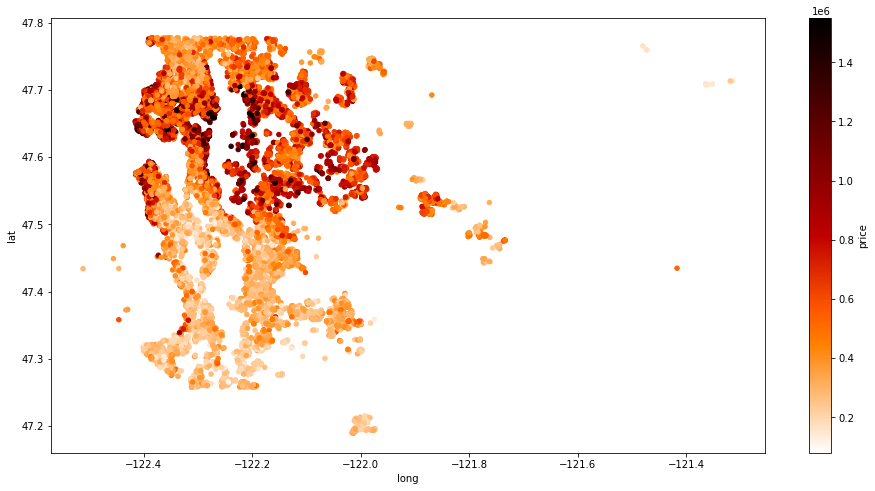

In [5]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", cmap="gist_heat_r", colorbar=True, sharex=False)


<AxesSubplot:xlabel='long', ylabel='lat'>

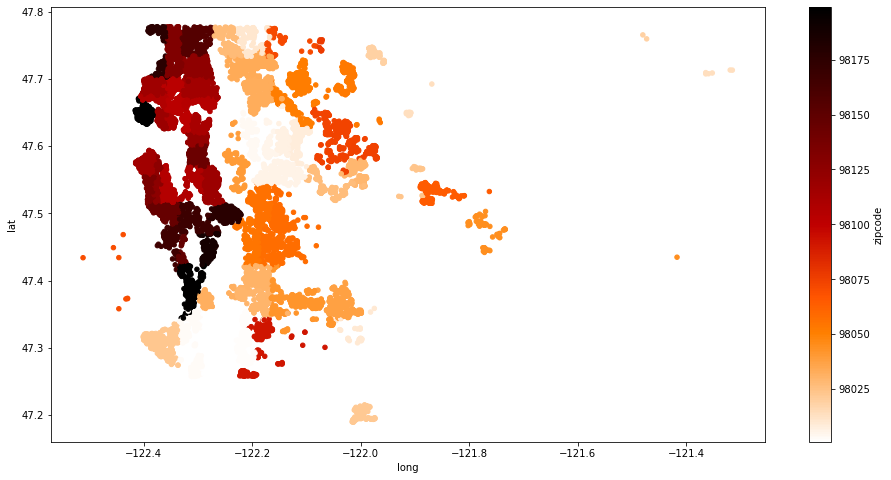

In [256]:
## HEATMAP FOR PRICE
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="zipcode", cmap="gist_heat_r", colorbar=True, sharex=False)


In [16]:
## HEATMAP FOR ZIPCODE

home_locations = df[['price','long','lat']].sample(1000)
mapping_2= folium.Map(location=[home_locations.lat.mean(),home_locations.long.mean()], zoom_start=9.5, detect_retina=True, control_scale=False, tiles="stamenterrain")


HeatMap(lan_long_2,min_opacity=2, blur = 3,radius=2).add_to(folium.FeatureGroup(name='Heat Map').add_to(mapping_2))
folium.LayerControl().add_to(mapping_2)
display(mapping_2)

# df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="zipcode", cmap="gist_heat_r", colorbar=True, sharex=False)

In [13]:
df.drop(['id','date','waterfront','view',"yr_built",'yr_renovated','sqft_living15','sqft_lot15','month_sold','year_sold'],1,inplace=True)

In [15]:
df['price'].describe()

count    1.595900e+04
mean     4.801934e+05
std      2.345875e+05
min      8.000000e+04
25%      3.100000e+05
50%      4.299000e+05
75%      5.950000e+05
max      1.550000e+06
Name: price, dtype: float64

In [244]:
grouped= df.groupby('zipcode').agg('mean')

In [245]:
grouped['price'].sort_values(ascending=False).head()

zipcode
98039    1.050000e+06
98004    9.183921e+05
98040    8.952600e+05
98112    8.616817e+05
98109    7.955733e+05
Name: price, dtype: float64

In [246]:
grouped

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,4.761151e+09,268767.267241,3.500000,2.121767,1890.090517,7490.038793,1.510776,0.000000,1.043103,3.232759,...,1722.116379,167.974138,1986.431034,25.745690,47.312470,-122.270466,1853.849138,7926.698276,2014.366379,6.375000
98002,4.774056e+09,230372.790698,3.284884,1.822674,1600.296512,6630.267442,1.351744,0.000000,1.000000,3.726744,...,1492.994186,107.302326,1968.372093,57.761628,47.309865,-122.214227,1474.819767,7042.529070,2014.348837,6.697674
98003,4.696407e+09,274273.570000,3.305000,2.020000,1795.030000,8038.540000,1.360000,0.000000,1.135000,3.330000,...,1603.095000,183.235000,1979.635000,10.055000,47.312545,-122.309865,1783.185000,8357.840000,2014.365000,6.630000
98004,4.529570e+09,918392.117117,3.387387,2.002252,2020.000000,8165.567568,1.315315,0.000000,1.036036,3.558559,...,1714.324324,305.675676,1966.783784,162.432432,47.611669,-122.201342,2176.486486,9110.882883,2014.324324,6.783784
98005,5.837418e+09,699205.015625,3.687500,2.257812,2266.250000,8647.625000,1.203125,0.000000,1.078125,3.750000,...,1779.062500,459.218750,1968.578125,31.359375,47.598967,-122.168187,2157.187500,8946.609375,2014.312500,6.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98177,4.098744e+09,552107.445055,3.313187,1.971154,2052.637363,7600.082418,1.250000,0.000000,1.494505,3.489011,...,1602.538462,445.923077,1960.730769,120.653846,47.739849,-122.368516,1974.890110,7861.587912,2014.274725,6.576923
98178,4.322729e+09,292824.486239,3.334862,1.716743,1699.036697,6888.151376,1.192661,0.009174,1.477064,3.334862,...,1303.256881,387.018349,1955.853211,64.353211,47.499644,-122.247014,1632.660550,7270.128440,2014.270642,7.068807
98188,4.553055e+09,276157.475248,3.366337,1.797030,1703.930693,8398.504950,1.198020,0.000000,1.099010,3.287129,...,1419.633663,271.980198,1965.702970,39.534653,47.447272,-122.281149,1624.990099,9405.663366,2014.405941,6.277228
